In [51]:
import sys
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tsfresh import extract_features

sys.path.append('../../')
sys.path.append('../preprocess')
from ranewable.ranewable import Ra
import preprocess_gefcom2014_solar

## Load json

In [52]:
params_path = '../params/params_competition_gefcom2014_solar.json'
with open(params_path, 'r', encoding='utf-8') as file:
    params_json = json.loads(file.read())

In [53]:
params_json

{'trial_name': 'trial14',
 'trial_comment': 'Only using radiation VAR169.',
 'path_result': './result/gefcom2014/solar/competition/',
 'path_raw_data': './data/gefcom2014/raw/gefcom2014-solar-raw.csv',
 'path_preprocessed_data': './data/gefcom2014/preprocessed/gefcom2014-solar-preprocessed.csv',
 'data_resolution': '60min',
 'farm_coords': [[145, -37, 5], [145, -37, 5], [145, -37, 5]],
 'farm_altitude': [595, 602, 951],
 'farm_capacity': [1, 1, 1],
 'panel_orientation': [38, 327, 31],
 'panel_tilt': [36, 35, 21],
 'train_splits': [['2012-04-01 01:00:00', '2013-04-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-05-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-06-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-07-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-08-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-09-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-10-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-11-01 00:00:00'],
  ['2012-04-01 01:00:00', '2013-12-01 00:00:00'],
  ['2012-04-01 

## Load data

In [54]:
df = preprocess_gefcom2014_solar.load_data('.'+params_json['path_raw_data'], header=[0,1])

In [55]:
df.head()

ZONEID,1,2,3,1,2,3,1,2,3,1,...,3,1,2,3,1,2,3,1,2,3
,POWER,POWER,POWER,VAR134,VAR134,VAR134,VAR157,VAR157,VAR157,VAR164,...,VAR178,VAR228,VAR228,VAR228,VAR78,VAR78,VAR78,VAR79,VAR79,VAR79
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2012-04-01 01:00:00,0.754103,0.647328,0.799000,94843.6250,94290.6250,92667.6250,60.221909,57.374252,57.003159,0.244601,...,2901861.0,0.000000,0.000000,0.000000,0.001967,0.001479,0.003531,0.003609,0.005444,0.024673
2012-04-01 02:00:00,0.555000,0.621822,0.817500,94757.9375,94217.6875,92622.6875,54.678604,57.129776,64.960831,0.457138,...,5980930.0,0.000000,0.000000,0.000774,0.005524,0.018304,0.027482,0.033575,0.101553,0.140474
2012-04-01 03:00:00,0.438397,0.472692,0.571500,94732.8125,94201.0625,92598.8125,61.294891,63.076141,66.795868,0.771429,...,8822632.0,0.001341,0.001256,0.001671,0.030113,0.035255,0.032356,0.132009,0.112935,0.136617
2012-04-01 04:00:00,0.145449,0.098866,0.063775,94704.0625,94156.0625,92542.0625,67.775284,62.975479,65.177628,0.965866,...,11178847.0,0.002501,0.001726,0.002084,0.057167,0.064514,0.031952,0.110645,0.107761,0.097370
2012-04-01 05:00:00,0.111987,0.104393,0.103700,94675.0000,94124.2500,92508.0000,70.172989,65.053848,65.744278,0.944669,...,13079958.0,0.003331,0.002093,0.002534,0.051027,0.059495,0.048494,0.189560,0.157593,0.163773


## Convert to standard indexing

In [56]:
df.index.name = 'valid_datetime'
idx_ref_datetime = df.index.hour == 1
df.loc[idx_ref_datetime, 'ref_datetime'] = df.index[idx_ref_datetime]
df.loc[:, 'ref_datetime'] = df.loc[:, 'ref_datetime'].fillna(method='ffill')
df = df.set_index('ref_datetime', append=True, drop=True)[df.columns.levels[0][:-1]]
df.index = df.index.reorder_levels(['ref_datetime', 'valid_datetime'])
df = df.sort_index()
columns = [df.columns.levels[0][:-1].values, df.columns.levels[1][:-1].values]
df.columns = pd.MultiIndex.from_product(columns)

In [57]:
df.head(50)

1                          \
                                            POWER      VAR134      VAR157   
ref_datetime        valid_datetime                                          
2012-04-01 01:00:00 2012-04-01 01:00:00  0.754103  94843.6250   60.221909   
                    2012-04-01 02:00:00  0.555000  94757.9375   54.678604   
                    2012-04-01 03:00:00  0.438397  94732.8125   61.294891   
                    2012-04-01 04:00:00  0.145449  94704.0625   67.775284   
                    2012-04-01 05:00:00  0.111987  94675.0000   70.172989   
                    2012-04-01 06:00:00  0.057244  94676.9375   72.374039   
                    2012-04-01 07:00:00  0.088718  94708.0625   81.798737   
                    2012-04-01 08:00:00  0.030064  94748.8125   87.854065   
                    2012-04-01 09:00:00  0.000128  94785.8125   88.793488   
                    2012-04-01 10:00:00  0.000000  94817.7500   90.450668   
                    2012-04-01 11:00:00  0.000000  94847.3750   90.676178   
                    2012-04-01 12:00:00  0.000000  94852.0625   92.928909   
                    2012-04-01 13:00:00  0.000000  94810.6250   94.989517   
                    2012-04-01 14:00:00  0.000000  94758.1250   94.810333   
                    2012-04-01 15:00:00  0.000000  94730.3750   95.559967   
                    2012-04-01 16:00:00  0.000000  94721.5625   99.391953   
                    2012-04-01 17:00:00  0.000000  94707.7500   99.679733   
                    2012-04-01 18:00:00  0.000000  94699.6875  100.207092   
                    2012-04-01 19:00:00  0.000000  94733.3125   99.531464   
                    2012-04-01 20:00:00  0.000000  94749.8125   99.423080   
                    2012-04-01 21:00:00  0.006346  94769.0000   98.573013   
                    2012-04-01 22:00:00  0.071538  94787.9375   92.123108   
                    2012-04-01 23:00:00  0.229167  94775.2500   82.745255   
                    2012-04-02 00:00:00  0.346474  94736.1250   71.751297   
2012-04-02 01:00:00 2012-04-02 01:00:00  0.656859  94746.8125   69.933548   
                    2012-04-02 02:00:00  0.771410  94678.8750   65.649643   
                    2012-04-02 03:00:00  0.613782  94608.3750   60.074112   
                    2012-04-02 04:00:00  0.554808  94533.6875   54.512299   
                    2012-04-02 05:00:00  0.458910  94505.9375   51.137894   
                    2012-04-02 06:00:00  0.198269  94503.8125   48.856094   
                    2012-04-02 07:00:00  0.085064  94518.3125   54.097427   
                    2012-04-02 08:00:00  0.011474  94576.5625   61.205093   
                    2012-04-02 09:00:00  0.000128  94605.3750   69.004196   
                    2012-04-02 10:00:00  0.000000  94615.6250   75.616730   
                    2012-04-02 11:00:00  0.000000  94632.0625   81.175858   
                    2012-04-02 12:00:00  0.000000  94596.3750   85.850693   
                    2012-04-02 13:00:00  0.000000  94592.4375   88.476013   
                    2012-04-02 14:00:00  0.000000  94570.8750   89.452911   
                    2012-04-02 15:00:00  0.000000  94567.5625   89.747833   
                    2012-04-02 16:00:00  0.000000  94550.3125   91.045074   
                    2012-04-02 17:00:00  0.000000  94505.2500   92.861114   
                    2012-04-02 18:00:00  0.000000  94501.5000   94.401443   
                    2012-04-02 19:00:00  0.000000  94527.5000   94.462448   
                    2012-04-02 20:00:00  0.000000  94541.9375   93.768936   
                    2012-04-02 21:00:00  0.015000  94569.3750   91.512985   
                    2012-04-02 22:00:00  0.086282  94632.7500   81.695084   
                    2012-04-02 23:00:00  0.315256  94631.3125   75.529312   
                    2012-04-03 00:00:00  0.514551  94624.6250   73.051941   
2012-04-03 01:00:00 2012-04-03 01:00:00  0.734615  94711.4375   63.741364   
                    2012-04-03 02:00:00  0.6

## Preprocess data (feature engineering)

### Average point features

In [7]:
# Average point features over hour
features_point = ['VAR134', 'VAR157', 'VAR164', 'VAR165', 'VAR166', 'VAR167', 'VAR78', 'VAR79']
df_point = df.loc[:,(slice(None),features_point)]
df_point = df_point.rolling(2).mean().shift(-1).fillna(method='ffill')
#df.loc[:,(slice(None),features_point)] = df_point

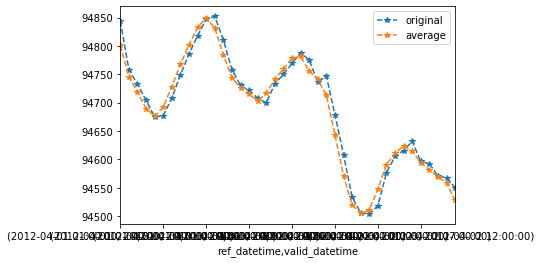

In [8]:
df['1']['VAR134'].iloc[:40].plot(linestyle='--', marker='*', label='original')
df_point['1']['VAR134'].iloc[:40].plot(linestyle='--', marker='*', label='average')
plt.legend()

In [9]:
df.loc[:,(slice(None),features_point)] = df_point

### Differentiate accumulated features

In [10]:
# Differentiate accumulated features
features_accum = ['VAR169', 'VAR175', 'VAR178', 'VAR228']
df_accum = df.loc[:,(slice(None),features_accum)]
df_accum = df_accum.diff()
df_accum[df_accum.index.levels[1].hour==1] = df.loc[df_accum.index.levels[1].hour==1,(slice(None),features_accum)]
df_accum.loc[:,(slice(None),features_accum[:3])] = df_accum.loc[:,(slice(None),features_accum[:3])]/3600 # Convert from J to Wh/h
#df.loc[:,(slice(None),features_accum)] = df_accum

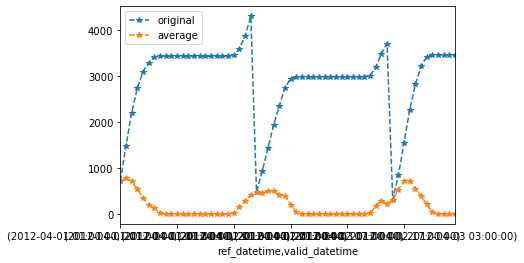

In [11]:
(df['1']['VAR169']/3600).iloc[:60].plot(linestyle='--', marker='*', label='original')
df_accum['1']['VAR169'].iloc[:60].plot(linestyle='--', marker='*', label='average')
plt.legend()

In [12]:
df.loc[:,(slice(None),features_accum)] = df_accum

### Physical features

Features to add:
* azimuth
* zenith 
* diffuse radiation
* beam radiation
* clear sky forecast
* physical forecast

#### Solar position

In [13]:
for i, (coords, alt, cap, orien, tilt) in enumerate(zip(params_json['farm_coords'],
                                        params_json['farm_altitude'],
                                        params_json['farm_capacity'],
                                        params_json['panel_orientation'],
                                        params_json['panel_tilt'])):
    ra =  Ra(longitude=coords[0],
             latitude=coords[1],
             altitude=alt,
             capacity=cap, 
             orientation=orien,
             tilt=tilt) 
    
    df_solpos = ra.calculate_solpos(df[str(i+1)].index)
    df_clearsky = ra.calculate_clearsky(df[str(i+1)].index)
    df_power_clearsky = ra.calculate_power_clearsky(df[str(i+1)].index)
    df_weather = ra.weather_from_ghi(df.loc[:,(str(i+1),'VAR169')])
    df_power = ra.calculate_power(df_weather.copy())

    df_solpos = df_solpos.loc[:, ['zenith', 'azimuth']]
    df_clearsky.columns = df_clearsky.columns+'_clearsky'
    df_weather = df_weather.loc[:, ['dni', 'dhi', 'ghi']]

    for column in df_solpos.columns: 
        df.loc[:,(str(i+1),column)] = df_solpos.loc[:, column]
    for column in df_clearsky.columns: 
        df.loc[:,(str(i+1),column)] = df_clearsky.loc[:, column]
    for column in df_weather.columns: 
        df.loc[:,(str(i+1),column)] = df_weather.loc[:, column]
    df.loc[:,(str(i+1),'Clearsky_Forecast')] = df_power_clearsky
    df.loc[:,(str(i+1),'Physical_Forecast')] = df_power

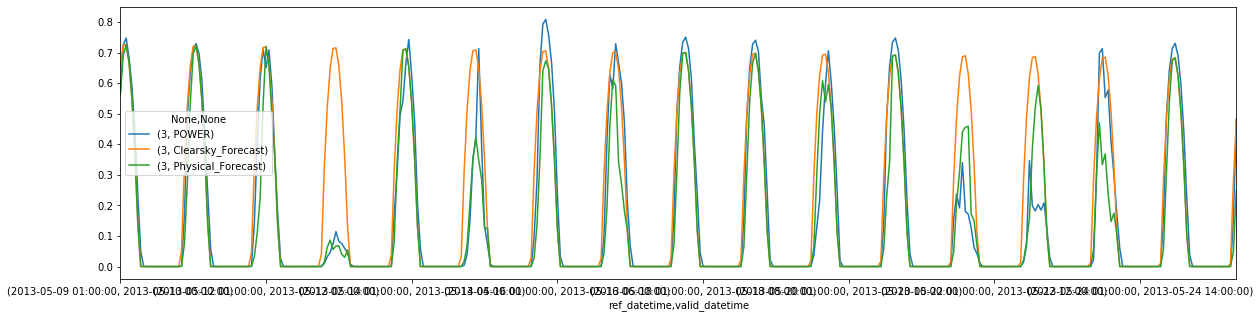

In [14]:
df.loc[(slice(None), slice('2013-05-10','2013-05-25')), ('3', ['POWER', 'Clearsky_Forecast', 'Physical_Forecast'])].plot(figsize=(20,5))

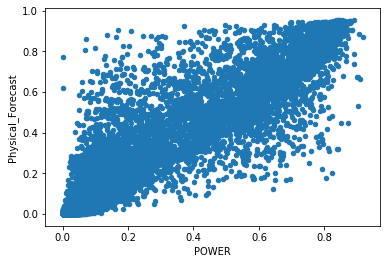

In [15]:
df['1'][['POWER', 'Physical_Forecast']].plot.scatter(x='POWER', y='Physical_Forecast')

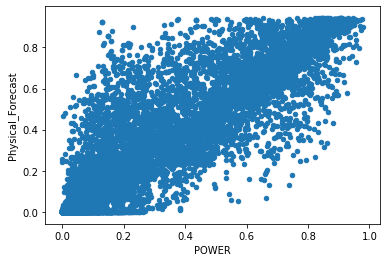

In [16]:
df['2'][['POWER', 'Physical_Forecast']].plot.scatter(x='POWER', y='Physical_Forecast')

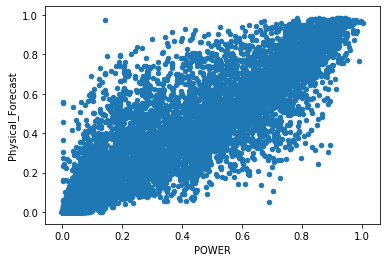

In [17]:
df['3'][['POWER', 'Physical_Forecast']].plot.scatter(x='POWER', y='Physical_Forecast')

### Power difference

In [18]:
for farm in df.columns.levels[0]: 
    df.loc[:,(farm,'DIFF')] = (df.loc[:,(farm,'POWER')]-df.loc[:,(farm,'Physical_Forecast')])

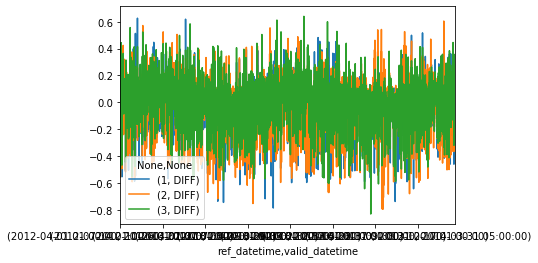

In [19]:
df.loc[:, (slice(None), 'DIFF')].plot()

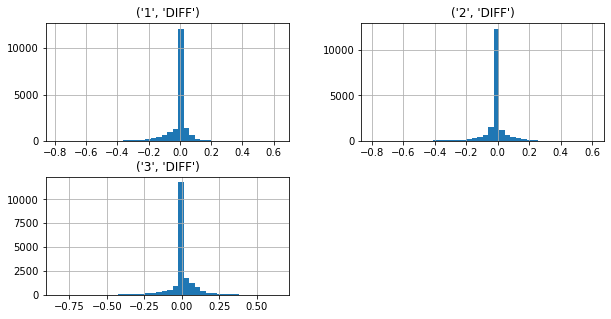

In [20]:
df.loc[:, (slice(None), 'DIFF')].hist(bins=40, figsize=(10,5));

### Add lead_time feature

In [21]:
# Add lead time feature
ref_datetime = df.index.get_level_values(0)
valid_datetime = df.index.get_level_values(1)
lead_time = (valid_datetime-ref_datetime)/pd.Timedelta('1 hour')
for farm in df.columns.levels[0]:
    df.loc[:,(farm,'LEAD_TIME')] = lead_time

In [22]:
df.loc[:,('1','LEAD_TIME')].head()

ref_datetime         valid_datetime     
2012-04-01 01:00:00  2012-04-01 01:00:00    0.0
                     2012-04-01 02:00:00    1.0
                     2012-04-01 03:00:00    2.0
                     2012-04-01 04:00:00    3.0
                     2012-04-01 05:00:00    4.0
Name: (1, LEAD_TIME), dtype: float64

### Lagged features

In [39]:
variables_lags = {'VAR169': [-1,1,2,3]}
variables_lags

{'VAR169': [-1, 1, 2, 3]}

In [43]:
str(-1)

'-1'

In [7]:
for farm in df.columns.levels[0]:
    for variable, lags in variables_lags.items():
        for lag in lags:
            df.loc[:, (farm, variable+'_lag{0}'.format(lag))] = df.loc[:, (farm, variable)].shift(lag)

NameError: name 'variables_lags' is not defined

In [59]:
df

1                          \
                                            POWER       VAR134     VAR157   
ref_datetime        valid_datetime                                          
2012-04-01 01:00:00 2012-04-01 01:00:00  0.754103  94800.78125  57.450256   
                    2012-04-01 02:00:00  0.555000  94745.37500  57.986748   
                    2012-04-01 03:00:00  0.438397  94718.43750  64.535088   
                    2012-04-01 04:00:00  0.145449  94689.53125  68.974136   
                    2012-04-01 05:00:00  0.111987  94675.96875  71.273514   
                    2012-04-01 06:00:00  0.057244  94692.50000  77.086388   
                    2012-04-01 07:00:00  0.088718  94728.43750  84.826401   
                    2012-04-01 08:00:00  0.030064  94767.31250  88.323776   
                    2012-04-01 09:00:00  0.000128  94801.78125  89.622078   
                    2012-04-01 10:00:00  0.000000  94832.56250  90.563423   
                    2012-04-01 11:00:00  0.000000  94849.71875  91.802544   
                    2012-04-01 12:00:00  0.000000  94831.34375  93.959213   
                    2012-04-01 13:00:00  0.000000  94784.37500  94.899925   
                    2012-04-01 14:00:00  0.000000  94744.25000  95.185150   
                    2012-04-01 15:00:00  0.000000  94725.96875  97.475960   
                    2012-04-01 16:00:00  0.000000  94714.65625  99.535843   
                    2012-04-01 17:00:00  0.000000  94703.71875  99.943413   
                    2012-04-01 18:00:00  0.000000  94716.50000  99.869278   
                    2012-04-01 19:00:00  0.000000  94741.56250  99.477272   
                    2012-04-01 20:00:00  0.000000  94759.40625  98.998047   
                    2012-04-01 21:00:00  0.006346  94778.46875  95.348061   
                    2012-04-01 22:00:00  0.071538  94781.59375  87.434181   
                    2012-04-01 23:00:00  0.229167  94755.68750  77.248276   
                    2012-04-02 00:00:00  0.346474  94741.46875  70.842422   
2012-04-02 01:00:00 2012-04-02 01:00:00  0.656859  94712.84375  67.791595   
                    2012-04-02 02:00:00  0.771410  94643.62500  62.861877   
                    2012-04-02 03:00:00  0.613782  94571.03125  57.293205   
                    2012-04-02 04:00:00  0.554808  94519.81250  52.825096   
                    2012-04-02 05:00:00  0.458910  94504.87500  49.996994   
                    2012-04-02 06:00:00  0.198269  94511.06250  51.476761   
...                                           ...          ...        ...   
2014-06-29 01:00:00 2014-06-29 19:00:00  0.000000  94215.90625  84.595528   
                    2014-06-29 20:00:00  0.000000  94313.71875  84.337128   
                    2014-06-29 21:00:00  0.000064  94412.00000  84.090042   
                    2014-06-29 22:00:00  0.014038  94501.65625  81.450310   
                    2014-06-29 23:00:00  0.044231  94575.84375  75.386169   
                    2014-06-30 00:00:00  0.583141  94603.25000  68.753113   
2014-06-30 01:00:00 2014-06-30 01:00:00  0.687436  94582.75000  63.082817   
                    2014-06-30 02:00:00  0.732821  94552.68750  58.737877   
                    2014-06-30 03:00:00  0.676218  94541.68750  55.570114   
                    2014-06-30 04:00:00  0.525769  94563.46875  54.014732   
                    2014-06-30 05:00:00  0.259295  94616.25000  57.700348   
                    2014-06-30 06:00:00  0.164487  94684.62500  65.867027   
                    2014-06-30 07:00:00  0.021923  94748.71875  71.428612   
                    2014-06-30 08:00:00  0.000192  94812.15625  73.321709   
                    2014-06-30 09:00:00  0.000000  94896.62500  75.098785   
                    2014-06-30 10:00:00  0.000000  94971.90625  79.038391   
                    2014-06-30 11:00:00  0.000000  95012.25000  83.074043   
                    2014-06-30 12:00:00  0.000000  95044.78125  84.478096   
                    2014-06-30 13:00:00  0.0

In [56]:
df.loc[:, ('1', variable+'_lag{0}'.format(lag))] = 1

In [36]:
variables_lag = {'VAR169': [-1,1,2,3]}


#df.loc[:, (slice(None, variables_lag))]

## Normalise by clearsky power

Does not seem like a good idea to normalise with the clearsky power since the real power is quite frequently higher and can be nonzero when clearsky power is zero. 

In [25]:
for column in df.columns.levels[0]: 
    power_norm = df.loc[:, (column, 'POWER')] / df.loc[:, (column, 'Clearsky_Forecast')]
    idx_true = power_norm <= 1
    idx_false = power_norm > 1

    df.loc[idx_true, (column, 'POWER_NORM')] = power_norm
    df.loc[idx_false, (column, 'POWER_NORM')] = 1.0

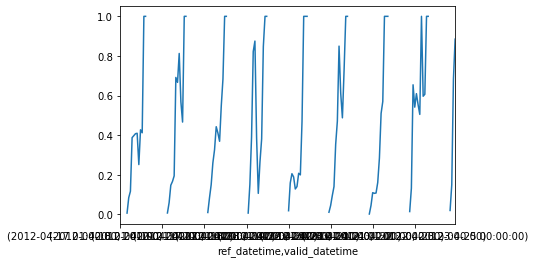

In [26]:
df['1']['POWER_NORM'].iloc[400:600].plot()